In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DBAS-Step2-Data Understanding').getOrCreate()

# Enable pandas-on-Spark
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
print(pyspark.__version__)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/10 06:24:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


3.2.1


In [2]:
## Load data from csv file
spk_df = spark.read.csv("Data/heart_failure_dataset_raw.csv", header=True, inferSchema=True)
spk_df.printSchema()

# Convert Spark DataFrame to pandas-on-Spark DataFrame using to_pandas_on_spark()
spkpd_df = spk_df.to_pandas_on_spark()
spkpd_df.info()
spkpd_df.head()


root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



23/10/10 06:25:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int32  
 2   creatinine_phosphokinase  299 non-null    int32  
 3   diabetes                  299 non-null    int32  
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    int32  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int32  
 9   sex                       299 non-null    int32  
 10  smoking                   299 non-null    int32  
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    int32  
dtypes: float64(3), int32(10)

23/10/10 06:25:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#### ----------03-DP 

# Add any data preparation approaches for following DM steps

## Convert the data types
print("--------- Before converting -----------------------------------")
print(spkpd_df.dtypes)
spkpd_df = spkpd_df.astype({
    'anaemia' : bool, 
    'high_blood_pressure' : bool, 
    'smoking' : bool, 
    'diabetes' : bool, 
    'DEATH_EVENT' : bool,
    'sex' : bool,
    })

print("--------- After converting -----------------------------------")
print(spkpd_df.dtypes)

--------- Before converting -----------------------------------
age                         float64
anaemia                       int32
creatinine_phosphokinase      int32
diabetes                      int32
ejection_fraction             int32
high_blood_pressure           int32
platelets                   float64
serum_creatinine            float64
serum_sodium                  int32
sex                           int32
smoking                       int32
time                          int32
DEATH_EVENT                   int32
dtype: object
--------- After converting -----------------------------------
age                         float64
anaemia                        bool
creatinine_phosphokinase      int32
diabetes                       bool
ejection_fraction             int32
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int32
sex                            bool
smoking                        

In [4]:
spkpd_df.info()
print("---------")

23/10/10 06:25:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int32  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int32  
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    bool   
dtypes: bool(6), float64(3), int32(4)---------


In [5]:
## Change age from numeric to categorical 1
from pyspark.sql.functions import when

# Define the bins and labels
bins = [40, 50, 60, 70, 80, 100]
labels = ['age_40', 'age_50', 'age_60', 'age_70', 'age_80']

# Initialize Age_Level column with null values
spk_df = spkpd_df.to_spark()
spk_df = spk_df.withColumn("Age_Level", when(spk_df["age"].isNull(), None).otherwise(None))

# Create the Age_Level column using when conditions
for i in range(len(bins) - 1):
    spk_df = spk_df.withColumn(
        "Age_Level",
        when((spk_df["age"] >= bins[i]) & (spk_df["age"] < bins[i + 1]), labels[i]).otherwise(spk_df["Age_Level"])
    )


# Convert Spark DataFrame to pandas-on-Spark DataFrame
spkpd_df = spk_df.to_pandas_on_spark()
print("--------- Age_Level was added -----------------------------------")
spkpd_df.info()
spkpd_df.head()

--------- Age_Level was added -----------------------------------


23/10/10 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int32  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int32  
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    bool   
 13  Age_Level                 299 non-null    object 
dtypes: bool

23/10/10 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_Level
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,True,age_70
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True,age_50
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,True,age_60
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,True,age_50
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,True,age_60


In [6]:
# First, we have to register the DataFrame as a SQL temporary view.
spk_df.createOrReplaceTempView('patients')

# Here's another example:
results = spark.sql("SELECT age, Age_Level FROM patients")
results.show()

+----+---------+
| age|Age_Level|
+----+---------+
|75.0|   age_70|
|55.0|   age_50|
|65.0|   age_60|
|50.0|   age_50|
|65.0|   age_60|
|90.0|   age_80|
|75.0|   age_70|
|60.0|   age_60|
|65.0|   age_60|
|80.0|   age_80|
|75.0|   age_70|
|62.0|   age_60|
|45.0|   age_40|
|50.0|   age_50|
|49.0|   age_40|
|82.0|   age_80|
|87.0|   age_80|
|45.0|   age_40|
|70.0|   age_70|
|48.0|   age_40|
+----+---------+
only showing top 20 rows



Text(0.5, 1.0, 'Distribution of Age_Level')

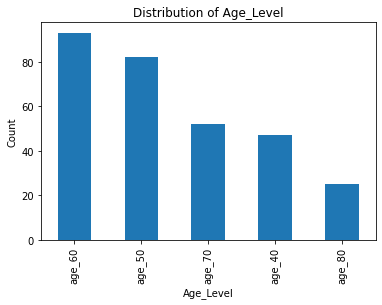

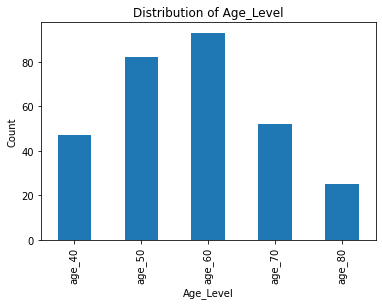

In [7]:
## Change age from numeric to categorical 1
# Add Visualisations
import matplotlib.pyplot as plt
from pyspark.pandas.config import set_option
set_option("plotting.backend", "matplotlib")

# Order by counts
fig, ax = plt.subplots()
spkpd_df['Age_Level'].value_counts().plot.bar(ax=ax)
ax.set_xlabel('Age_Level')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age_Level')

# Order by labels
fig, ax = plt.subplots()
spkpd_df['Age_Level'].value_counts().reindex(labels).plot.bar(ax=ax)
ax.set_xlabel('Age_Level')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age_Level')


23/10/10 06:25:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


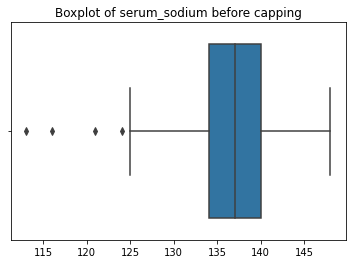

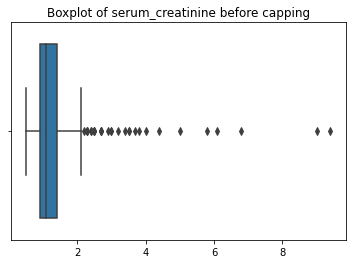

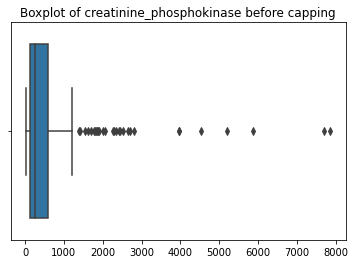

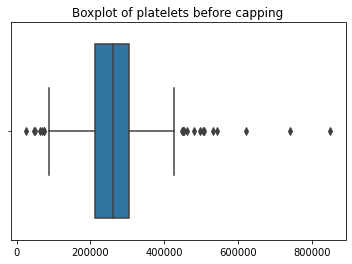

In [8]:
import seaborn as sns

columns_to_cap = ['serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets']

for col in columns_to_cap:
    
    # Boxplot before capping
    sns.boxplot(x=spkpd_df[col].to_numpy())
    #plt.title("Boxplot before capping")
    plt.title(f"Boxplot of {col} before capping")
    plt.show()


In [9]:

#### Handle extremes

columns_to_cap = ['serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets']

for col in columns_to_cap:

    Q1 = spkpd_df[col].quantile(0.25)
    Q3 = spkpd_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    
    
    # Handle extremes
    spkpd_df[col] = spkpd_df[col].apply(lambda x: upper_limit 
                                        if x > upper_limit 
                                        else (lower_limit if x < lower_limit 
                                              else x))                                
    

23/10/10 06:25:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 0

23/10/10 06:25:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


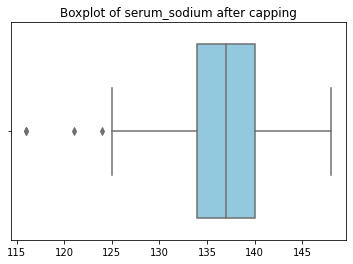

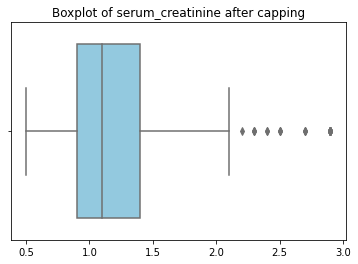

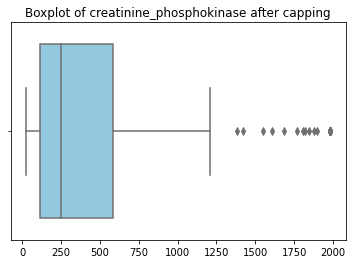

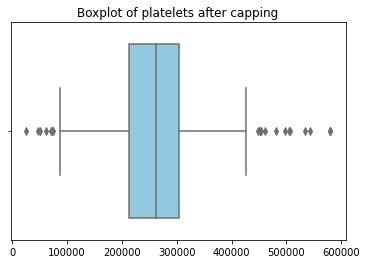

In [10]:
columns_to_cap = ['serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets']

for col in columns_to_cap:
    # Boxplot after capping
    sns.boxplot(x=spkpd_df[col].to_numpy(), color='skyblue')
    #plt.title("Boxplot after capping")
    plt.title(f"Boxplot of {col} after capping")
    plt.show()

In [11]:
spkpd_df.info()
spk_df.printSchema()

23/10/10 06:25:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    bool   
 13  Age_Level                 299 non-null    object 
dtypes: bool

In [12]:
## Change days to months
from pyspark.sql import functions as F

# Change days to months
spk_df = spk_df.withColumn('follow_up_month', spk_df['time'] / 30)


spk_df.printSchema()
spkpd_df.info()
print("-----------------------")

# Register the DataFrame as a SQL temporary view
spk_df.createOrReplaceTempView('patients')

# Execute SQL query
results = spark.sql("SELECT time, follow_up_month FROM patients")
results.show()


root
 |-- age: double (nullable = true)
 |-- anaemia: boolean (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: boolean (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: boolean (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: boolean (nullable = true)
 |-- smoking: boolean (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: boolean (nullable = true)
 |-- Age_Level: string (nullable = true)
 |-- follow_up_month: double (nullable = true)



23/10/10 06:25:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    bool   
 13  Age_Level                 299 non-null    object 
dtypes: bool

In [13]:
# Format the follow_up_month
spk_df = spk_df.withColumn('follow_up_month', F.round(spk_df['follow_up_month'], 2))

# Register the DataFrame as a SQL temporary view
spk_df.createOrReplaceTempView('patients')

# Execute SQL query
results = spark.sql("SELECT time, follow_up_month FROM patients")
results.show()


+----+---------------+
|time|follow_up_month|
+----+---------------+
|   4|           0.13|
|   6|            0.2|
|   7|           0.23|
|   7|           0.23|
|   8|           0.27|
|   8|           0.27|
|  10|           0.33|
|  10|           0.33|
|  10|           0.33|
|  10|           0.33|
|  10|           0.33|
|  10|           0.33|
|  11|           0.37|
|  11|           0.37|
|  12|            0.4|
|  13|           0.43|
|  14|           0.47|
|  14|           0.47|
|  15|            0.5|
|  15|            0.5|
+----+---------------+
only showing top 20 rows



In [14]:

# Convert Spark DataFrame to pandas-on-Spark DataFrame
spkpd_df = spk_df.to_pandas_on_spark()
spkpd_df.info()
spkpd_df.head()

23/10/10 06:25:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int32  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int32  
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    bool   
 13  Age_Level                 299 non-null    object 
 14  follow_

23/10/10 06:25:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 06:25:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_Level,follow_up_month
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,True,age_70,0.13
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True,age_50,0.20
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,True,age_60,0.23
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,True,age_50,0.23
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,True,age_60,0.27


In [15]:
# 保存为 CSV 文件
spk_df.write.csv("Data/3DP", header=True)

In [ ]:
# Stop Spark session
spark.stop()